# Predicting Diabetes Using BRFSS Data

In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats

C:\Users\shrus\AppData\Roaming\Python\Python312\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
pd.set_option("display.max_columns",850)
pd.set_option("display.max_rows",85)

#### Convert data from a SAS format to CSV format

In [3]:
#temp_df=pd.read_sas("LLCP2022.XPT")

In [4]:
#temp_df.to_csv('BRFSS_2022.csv', sep=",", index=False)

In [5]:
BRFSS_2022 = pd.read_csv('BRFSS_2022.csv')
BRFSS_2022

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHON1,LADULT1,COLGSEX1,NUMADULT,LANDSEX1,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX1,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,SLEPTIM1,LASTDEN4,RMVTETH4,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNC1,CHCOCNC1,CHCCOPD3,ADDEPEV3,CHCKDNY2,HAVARTH4,DIABETE4,DIABAGE4,MARITAL,EDUCA,RENTHOM1,NUMHHOL4,NUMPHON4,CPDEMO1C,VETERAN3,EMPLOY1,CHILDREN,INCOME3,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,HADMAM,HOWLONG,CERVSCRN,CRVCLCNC,CRVCLPAP,CRVCLHPV,HADHYST2,HADSIGM4,COLNSIGM,COLNTES1,SIGMTES1,LASTSIG4,COLNCNCR,VIRCOLO1,VCLNTES2,SMALSTOL,STOLTEST,STOOLDN2,BLDSTFIT,SDNATES1,SMOKE100,SMOKDAY2,USENOW3,ECIGNOW2,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSC1,LCSSCNCR,LCSCTWHN,ALCDAY4,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,PNEUVAC4,TETANUS1,HIVTST7,HIVTSTD3,HIVRISK5,COVIDPOS,COVIDSMP,COVIDPRM,PDIABTS1,PREDIAB2,DIABTYPE,INSULIN1,CHKHEMO3,EYEEXAM1,DIABEYE1,DIABEDU1,FEETSORE,TOLDCFS,HAVECFS,WORKCFS,IMFVPLA3,HPVADVC4,HPVADSHT,SHINGLE2,COVIDVA1,COVACGET,COVIDNU1,COVIDINT,COVIDFS1,COVIDSE1,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,CNCRDIFF,CNCRAGE,CNCRTYP2,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,PSATEST1,PSATIME1,PCPSARS2,PSASUGST,PCSTALK1,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,ACEADSAF,ACEADNED,LSATISFY,EMTSUPRT,SDHISOLT,SDHEMPLY,FOODSTMP,SDHFOOD1,SDHBILLS,SDHUTILS,SDHTRNSP,SDHSTRE1,MARIJAN1,MARJSMOK,MARJEAT,MARJVAPE,MARJDAB,MARJOTHR,USEMRJN4,LASTSMK2,STOPSMK2,MENTCIGS,MENTECIG,HEATTBCO,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,FIREARM5,GUNLOAD,LOADULK2,RCSGEND1,RCSXBRTH,RCSRLTN2,CASTHDX2,CASTHNO2,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,HADSEX,PFPPRVN4,TYPCNTR9,BRTHCNT4,WHEREGET,NOBCUSE8,BCPREFER,RRCLASS3,RRCOGNT2,RRTREAT,RRATWRK2,RRHCARE4,RRPHYSM2,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE2,_CPRACE2,CAGEG,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_HCVU652,_TOTINDA,_EXTETH3,_ALTETH3,_DENVST3,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_PRACE2,_MRACE2,_HISPANC,_RACE1,_RACEG22,_RACEGR4,_RACEPR1,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_RFMAM22,_MAM5023,_HADCOLN,_CLNSCP1,_HADSIGM,_SGMSCP1,_SGMS101,_RFBLDS5,_STOLDN1,_VIRCOL1,_SBONTI1,_CRCREC2,_SMOKER3,_RFSMOK3,_CURECI2,_YRSSMOK,_PACKDAY,_PACKYRS,_YRSQUIT,_SMOKGRP,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.0,1.0,b'02032022',b'02',b'03',b'2022',1100.0,b'2022000001',2.022000e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,88.0,88.0,NaN,99.0,1.0,2.0,1.0,2.0,8.0,NaN,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,80.0,1.0,6.0,1.0,1.0,1.0,2.0,2.0,7.0,88.0,99.0,NaN,9999.0,9999.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN,2.0,1.0,3.0,2.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,4.0,NaN,NaN,NaN,2.0,NaN,NaN,888.0,NaN,NaN,NaN,1.0,92021.0,2.0,3.0,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,5.0,2.0,2.0,5.0,2.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,1.0,1.0,2.0,11011.0,37.418416,2.0,74.836832,1.0,9.0,NaN,NaN,NaN,NaN,1.0,0.520383,813.918517,487.612985,1.0,1.0,1.0,9.0,

#### Create datasets with selected variables

The features are slected based on the paper: https://www.cdc.gov/pcd/issues/2019/19_0109.htm
I have selected 24 independent features from the available 328 features. This doesnt mean that all 24 features are going to be used in fitting the model.

##### Response Variable / Dependent Variable

- **Diabetes**  
  *(Ever told) (you had) diabetes? (If ´Yes´ and respondent is female, ask ´Was this only when you were pregnant?´. If Respondent says pre-diabetes or borderline diabetes, use response code 4.)*  
  **Variable Name:** `DIABETE4`  

##### Independent Variables

1. **Demographics**
   - **Fourteen-level age category**  
     **Variable Name:** `_AGEG5YR`
   - **Calculated sex variable**  
     **Variable Name:** `_SEX`
   - **What is the highest grade or year of school you completed?**  
     **Variable Name:** `EDUCAG`
   - **Income categories**  
     **Variable Name:** `_INCOMG1`
  
2. **COVID**
   - **Has a doctor, nurse, or other health professional ever told you that you tested positive for COVID 19?**  
     **Variable Name:** `COVIDPOS`  
  
3. **BMI**
   - **Body Mass Index (BMI)**  
     **Variable Name:** `_BMI5`
  
4. **Smoking**
   - **Have you smoked at least 100 cigarettes in your entire life?**  
     **Variable Name:** `SMOKE100`
   - **Four-level smoker status: Everyday smoker, Someday smoker, Former smoker, Non-smoker**  
     **Variable Name:** `_SMOKER3`
  
5. **Alcohol Consumption**
   - **Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)**  
     **Variable Name:** `_RFDRHV8`
  
6. **Other Chronic Health Conditions**
   - **(Ever told) (you had) a depressive disorder (including depression, major depression, dysthymia, or minor depression)?**  
     **Variable Name:** `ADDEPEV3`
   - **(Ever told) (you had) chronic obstructive pulmonary disease, C.O.P.D., emphysema or chronic bronchitis?**  
     **Variable Name:** `CHCCOPD3`
   - **Computed asthma status**  
     **Variable Name:** `_ASTHMS1`
   - **(Ever told) you had a stroke**  
     **Variable Name:** `CVDSTRK3`
   - **(Ever told) you had a heart attack, also called a myocardial infarction?**  
     **Variable Name:** `CVDINFR4`
   - **(Ever told) you had angina or coronary heart disease?**  
     **Variable Name:** `CVDCRHD4`
   - **Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?**  
     **Variable Name:** `CHCKDNY2`
   - **Respondents who have had a doctor diagnose them as having some form of arthritis**  
     **Variable Name:** `_DRDXAR2`
   - **Not including teeth lost for injury or orthodontics, how many of your permanent teeth have been removed because of tooth decay or gum disease?**  
     **Variable Name:** `RMVTETH4`
  
7. **Physical Activity**
   - **Adults who reported doing physical activity or exercise during the past 30 days other than their regular job**  
     **Variable Name:** `TOTINDA`
  
8. **Health Care**
   - **Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?**  
     **Variable Name:** `MEDCOST1`
   - **Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?**  
     **Variable Name:** `_HLTHPLN`
  
9. **Health General and Mental Health**
   - **Would you say that in general your health is:**  
     **Variable Name:** `GENHLTH`
   - **Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?**  
     **Variable Name:** `MENTHLTH`
   - **Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?**  
     **Variable Name:** `PHYSHLTH`
   - **Do you have serious difficulty walking or climbing stairs?**  
     **Variable Name:** `DIFFWALK`


In [6]:
df = BRFSS_2022[['DIABETE4', 
                 '_BMI5', 
                 '_SMOKER3', '_RFDRHV8',
                 'ADDEPEV3', 'CHCCOPD3', '_ASTHMS1', 'CVDSTRK3', 'CVDINFR4', 'CVDCRHD4','CHCKDNY2', '_DRDXAR2','RMVTETH4',
                 '_TOTINDA',
                 'MEDCOST1', '_HLTHPLN',
                 'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK',
                 '_AGEG5YR', '_SEX', '_EDUCAG', '_INCOMG1','COVIDPOS']].astype(float)
df

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
0,1.0,NaN,4.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,9.0,2.0,88.0,88.0,2.0,13.0,2.0,4.0,9.0,2.0
1,3.0,2657.0,4.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,1.0,1.0,88.0,88.0,2.0,13.0,2.0,2.0,3.0,2.0
2,3.0,2561.0,4.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,1.0,2.0,3.0,2.0,2.0,8.0,2.0,4.0,6.0,1.0
3,3.0,2330.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,NaN,1.0,2.0,9.0,1.0,88.0,88.0,2.0,14.0,2.0,2.0,9.0,2.0
4,3.0,2177.0,4.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,1.0,4.0,88.0,2.0,2.0,5.0,2.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,3.0,2563.0,4.0,9.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,8.0,1.0,2.0,1.0,3.0,3.0,88.0,2.0,1.0,2.0,2.0,1.0,1.0
445128,3.0,2866.0,4.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,8.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,7.0,2.0,4.0,5.0,2.0
445129,3.0,1723.0,1.0,9.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,5.0,30.0,30.0,2.0,10.0,2.0,2.0,9.0,2.0
445130,3.0,3255.0,4.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,8.0,2.0,2.0,1.0,2.0,88.0,88.0,2.0,11.0,1.0,3.0,5.0,1.0


In [7]:
df.shape

(445132, 25)

In [8]:
df.isnull().sum()

DIABETE4        3
_BMI5       48806
_SMOKER3        0
_RFDRHV8        0
ADDEPEV3        7
CHCCOPD3        2
_ASTHMS1        0
CVDSTRK3        2
CVDINFR4        4
CVDCRHD4        2
CHCKDNY2        2
_DRDXAR2     2633
RMVTETH4     1363
_TOTINDA        0
MEDCOST1        4
_HLTHPLN        0
GENHLTH         3
MENTHLTH        3
PHYSHLTH        5
DIFFWALK    22155
_AGEG5YR        0
_SEX            0
_EDUCAG         0
_INCOMG1        0
COVIDPOS    49235
dtype: int64

In [9]:
def Diabetes_Clean(df):
    '''
         0 is for no diabetes or only during pregnancy, 
         1 is for pre-diabetes or borderline diabetes, 
         2 is for yes diabetes
    '''
    
    df.drop(df[(df["DIABETE4"] == 7) | (df["DIABETE4"] == 9)].index, inplace=True)
    df['DIABETE4'] = [0 if (x == 2 or x == 3) else (1 if x == 4 else 2) for x in df['DIABETE4']]
    return df

Diabetes_Clean(df)

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
0,2,NaN,4.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,9.0,2.0,88.0,88.0,2.0,13.0,2.0,4.0,9.0,2.0
1,0,2657.0,4.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,1.0,1.0,88.0,88.0,2.0,13.0,2.0,2.0,3.0,2.0
2,0,2561.0,4.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,1.0,2.0,3.0,2.0,2.0,8.0,2.0,4.0,6.0,1.0
3,0,2330.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,NaN,1.0,2.0,9.0,1.0,88.0,88.0,2.0,14.0,2.0,2.0,9.0,2.0
4,0,2177.0,4.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,1.0,4.0,88.0,2.0,2.0,5.0,2.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,0,2563.0,4.0,9.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,8.0,1.0,2.0,1.0,3.0,3.0,88.0,2.0,1.0,2.0,2.0,1.0,1.0
445128,0,2866.0,4.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,8.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,7.0,2.0,4.0,5.0,2.0
445129,0,1723.0,1.0,9.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,5.0,30.0,30.0,2.0,10.0,2.0,2.0,9.0,2.0
445130,0,3255.0,4.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,8.0,2.0,2.0,1.0,2.0,88.0,88.0,2.0,11.0,1.0,3.0,5.0,1.0


#### Detecting and/or Handling the nan values and outliers

In [10]:
df.drop(df[(df["COVIDPOS"] == 7) | (df["COVIDPOS"] == 9)].index, inplace=True)
COVID_null=df['COVIDPOS'].isnull().sum()
COVID_count=df.groupby('DIABETE4')['COVIDPOS'].value_counts()

print(COVID_null),print(COVID_count)

49060
DIABETE4  COVIDPOS
0         2.0         224679
          1.0          93022
          3.0          11860
1         2.0           6458
          1.0           2596
          3.0            314
2         2.0          38335
          1.0          15088
          3.0           1244
Name: count, dtype: int64


(None, None)

In [11]:
def fill_na_with_mode(df):
    grouped = df.groupby('DIABETE4')
    for key, group in grouped:
        # Find the most frequent category in the group
        most_frequent = group['COVIDPOS'].mode()[0]
        # Fill NaNs with the most frequent category
        df.loc[group.index, 'COVIDPOS'] = group['COVIDPOS'].fillna(most_frequent)
    return df

# Apply the function to your DataFrame
df = fill_na_with_mode(df)


In [12]:
COVIDFilled_null=df['COVIDPOS'].isnull().sum()
COVIDFilled_count=df.groupby('DIABETE4')['COVIDPOS'].value_counts()

print(COVIDFilled_null),print(COVIDFilled_count)

0
DIABETE4  COVIDPOS
0         2.0         266489
          1.0          93022
          3.0          11860
1         2.0           7384
          1.0           2596
          3.0            314
2         2.0          44659
          1.0          15088
          3.0           1244
Name: count, dtype: int64


(None, None)

In [13]:
BMI_summary=df.groupby('DIABETE4')['_BMI5'].describe()
BMI_null=df.groupby('DIABETE4')['_BMI5'].apply(lambda x: x.isnull().sum())

print(BMI_null),print(BMI_summary)

DIABETE4
0    40827
1     1006
2     6159
Name: _BMI5, dtype: int64
             count         mean         std     min     25%     50%     75%  \
DIABETE4                                                                      
0         330544.0  2792.030713  621.561568  1202.0  2371.0  2693.0  3090.0   
1           9288.0  3124.718239  738.987550  1221.0  2637.0  3011.0  3495.0   
2          54832.0  3173.413445  728.129299  1211.0  2663.0  3061.0  3543.0   

             max  
DIABETE4          
0         9964.0  
1         9765.0  
2         9934.0  


(None, None)

In [14]:
def fill_na_with_median(df):
    grouped = df.groupby('DIABETE4')
    for key, group in grouped:
        median_value = group['_BMI5'].median()
        df.loc[group.index, '_BMI5'] = group['_BMI5'].fillna(median_value)
    return df

df = fill_na_with_median(df)


In [15]:
BMIFilled_null=df.groupby('DIABETE4')['_BMI5'].apply(lambda x: x.isnull().sum())
BMIFilled_summary=df.groupby('DIABETE4')['_BMI5'].describe()

print(BMIFilled_null),print(BMIFilled_summary)

DIABETE4
0    0
1    0
2    0
Name: _BMI5, dtype: int64
             count         mean         std     min     25%     50%     75%  \
DIABETE4                                                                      
0         371371.0  2781.143684  587.218696  1202.0  2421.0  2693.0  3027.0   
1          10294.0  3113.604915  702.758087  1221.0  2663.0  3011.0  3421.0   
2          60991.0  3162.061698  691.216846  1211.0  2728.0  3061.0  3472.0   

             max  
DIABETE4          
0         9964.0  
1         9765.0  
2         9934.0  


(None, None)

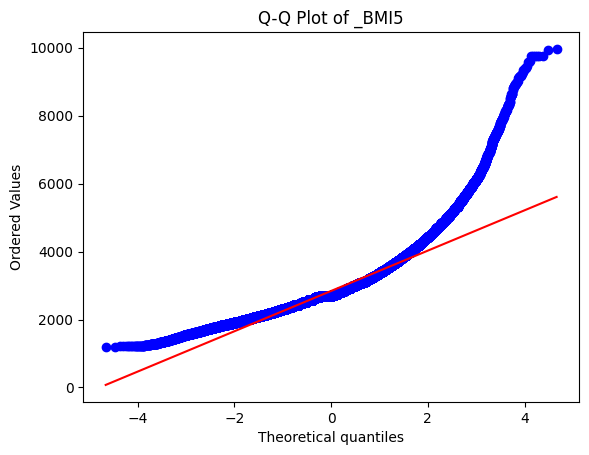

In [16]:
#Q_Q PLOT
stats.probplot(df['_BMI5'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of _BMI5')
plt.show()

I use IQR method to determine the outliers as data is not normally distributed. If data was normally distributed we could use zscore method. I am not doing further processing of the outliers , it will processed if needed

In [17]:
Q1 = df['_BMI5'].quantile(0.25)
Q3 = df['_BMI5'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['_BMI5'] < (Q1 - 1.5 * IQR)) | (df['_BMI5'] > (Q3 + 1.5 * IQR))]

In [18]:
outliers['_BMI5'].count()

18894

#### Clean the data

In [19]:
df.isnull().sum()

DIABETE4        0
_BMI5           0
_SMOKER3        0
_RFDRHV8        0
ADDEPEV3        7
CHCCOPD3        2
_ASTHMS1        0
CVDSTRK3        2
CVDINFR4        4
CVDCRHD4        2
CHCKDNY2        2
_DRDXAR2     2266
RMVTETH4     1355
_TOTINDA        0
MEDCOST1        4
_HLTHPLN        0
GENHLTH         3
MENTHLTH        3
PHYSHLTH        5
DIFFWALK    22081
_AGEG5YR        0
_SEX            0
_EDUCAG         0
_INCOMG1        0
COVIDPOS        0
dtype: int64

In [20]:
df = df.dropna()  
df.shape

(417084, 25)

In [21]:
df = df.drop_duplicates()
df.shape

(412787, 25)

In [22]:
df.nunique()

DIABETE4       3
_BMI5       3956
_SMOKER3       5
_RFDRHV8       3
ADDEPEV3       4
CHCCOPD3       4
_ASTHMS1       4
CVDSTRK3       4
CVDINFR4       4
CVDCRHD4       4
CHCKDNY2       4
_DRDXAR2       2
RMVTETH4       6
_TOTINDA       3
MEDCOST1       4
_HLTHPLN       3
GENHLTH        7
MENTHLTH      33
PHYSHLTH      33
DIFFWALK       4
_AGEG5YR      14
_SEX           2
_EDUCAG        5
_INCOMG1       8
COVIDPOS       3
dtype: int64

In [23]:
def BMI_Clean(df):
    '''Change the BMI value to the classic scale from 1 to 100 and convert the values into categories. Based on Codebook.
         - 1 is Underweight (BMI less then 18.5)
         - 2 is Normal Weight (BMI between 18.5–24.9)
         - 3 is Overweight (BMI between 25 - 29.9)
         - 4 is Obesity I degree (BMI between 30–34,9)
         - 5 is Obesity II degree (BMI between 35–39.9)
         - 6 is Obesity III degree (BMI 40 and more)
    '''

    df['_BMI5'] = df['_BMI5'].div(100).round(1)
    df.loc[df['_BMI5'] < 18.5, '_BMI5'] = 1
    df.loc[(df['_BMI5'] >= 18.5) & (df['_BMI5'] <= 24.9), '_BMI5'] = 2
    df.loc[(df['_BMI5'] >= 25) & (df['_BMI5'] <= 29.9), '_BMI5'] = 3
    df.loc[(df['_BMI5'] >= 30) & (df['_BMI5'] <= 34.9), '_BMI5'] = 4
    df.loc[(df['_BMI5'] >= 35) & (df['_BMI5'] <= 39.9), '_BMI5'] = 5
    df.loc[df['_BMI5'] >= 40, '_BMI5'] = 6
    return df

BMI_Clean(df)

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
342,0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,2.0,88.0,4.0,2.0,10.0,2.0,3.0,6.0,2.0
343,2,4.0,3.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,2.0,88.0,88.0,2.0,11.0,1.0,3.0,5.0,2.0
344,0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,4.0,88.0,30.0,2.0,11.0,1.0,4.0,5.0,2.0
345,0,4.0,3.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,88.0,88.0,1.0,12.0,1.0,4.0,5.0,1.0
346,0,4.0,4.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,4.0,88.0,5.0,1.0,13.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,0,3.0,4.0,9.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,8.0,1.0,2.0,1.0,3.0,3.0,88.0,2.0,1.0,2.0,2.0,1.0,1.0
445128,0,3.0,4.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,8.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,7.0,2.0,4.0,5.0,2.0
445129,0,1.0,1.0,9.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,5.0,30.0,30.0,2.0,10.0,2.0,2.0,9.0,2.0
445130,0,4.0,4.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,8.0,2.0,2.0,1.0,2.0,88.0,88.0,2.0,11.0,1.0,3.0,5.0,1.0


In [24]:
def Smoke_Clean(df):
    '''
         - 0 is the respondent does not smoke cigarettes
         - 1 is the respondent smokes cigarettes
         - 2 is former smoker
    '''
    
    df.drop(df[(df["_SMOKER3"] == 7) | (df["_SMOKER3"] == 9)].index, inplace=True)
    df['_SMOKER3'] = [1 if (x == 1 or x == 2) else (0 if x == 4 else 2) for x in df['_SMOKER3']]
    return df

Smoke_Clean(df)

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
342,0,3.0,2,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,2.0,88.0,4.0,2.0,10.0,2.0,3.0,6.0,2.0
343,2,4.0,2,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,2.0,88.0,88.0,2.0,11.0,1.0,3.0,5.0,2.0
344,0,3.0,2,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,4.0,88.0,30.0,2.0,11.0,1.0,4.0,5.0,2.0
345,0,4.0,2,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,88.0,88.0,1.0,12.0,1.0,4.0,5.0,1.0
346,0,4.0,0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,4.0,88.0,5.0,1.0,13.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,0,3.0,0,9.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,8.0,1.0,2.0,1.0,3.0,3.0,88.0,2.0,1.0,2.0,2.0,1.0,1.0
445128,0,3.0,0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,8.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,7.0,2.0,4.0,5.0,2.0
445129,0,1.0,1,9.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,5.0,30.0,30.0,2.0,10.0,2.0,2.0,9.0,2.0
445130,0,4.0,0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,8.0,2.0,2.0,1.0,2.0,88.0,88.0,2.0,11.0,1.0,3.0,5.0,1.0


In [25]:
def Alcohol_Clean(df):
    ''' 
         - 0 is the respondent does not use alcohol,
         - 1 is the respondent is using alcohol
    '''
    
    df.drop(df[(df["_RFDRHV8"] == 9)].index, inplace=True)
    df['_RFDRHV8'] = [0 if x == 1 else 1 for x in df['_RFDRHV8']]
    return df

Alcohol_Clean(df)

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
342,0,3.0,2,0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,2.0,88.0,4.0,2.0,10.0,2.0,3.0,6.0,2.0
343,2,4.0,2,0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,2.0,88.0,88.0,2.0,11.0,1.0,3.0,5.0,2.0
344,0,3.0,2,0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,4.0,88.0,30.0,2.0,11.0,1.0,4.0,5.0,2.0
345,0,4.0,2,0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,88.0,88.0,1.0,12.0,1.0,4.0,5.0,1.0
346,0,4.0,0,0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,4.0,88.0,5.0,1.0,13.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,0,2.0,0,0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,8.0,1.0,1.0,2.0,4.0,7.0,88.0,2.0,2.0,2.0,4.0,2.0,1.0
445124,2,3.0,0,0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,15.0,88.0,2.0,10.0,1.0,4.0,6.0,1.0
445126,0,4.0,0,0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,8.0,1.0,2.0,1.0,3.0,88.0,88.0,2.0,3.0,1.0,4.0,5.0,1.0
445128,0,3.0,0,0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,8.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,7.0,2.0,4.0,5.0,2.0


In [27]:
def Depression_Clean(df):
    '''  - 0 is the respondent had no depressive disorder,
         - 1 is the respondent had depressive disorders
    '''
    
    df.drop(df[(df["ADDEPEV3"] == 7) | (df["ADDEPEV3"] == 9)].index, inplace=True)
    df['ADDEPEV3'] = [0 if x == 2 else 1 for x in df['ADDEPEV3']]
    return df

Depression_Clean(df)

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
342,0,3.0,2,0,0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,2.0,88.0,4.0,2.0,10.0,2.0,3.0,6.0,2.0
343,2,4.0,2,0,0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,2.0,88.0,88.0,2.0,11.0,1.0,3.0,5.0,2.0
344,0,3.0,2,0,0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,4.0,88.0,30.0,2.0,11.0,1.0,4.0,5.0,2.0
345,0,4.0,2,0,0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,88.0,88.0,1.0,12.0,1.0,4.0,5.0,1.0
346,0,4.0,0,0,1,2.0,3.0,2.0,2.0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,4.0,88.0,5.0,1.0,13.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,0,2.0,0,0,1,2.0,3.0,2.0,2.0,2.0,2.0,2.0,8.0,1.0,1.0,2.0,4.0,7.0,88.0,2.0,2.0,2.0,4.0,2.0,1.0
445124,2,3.0,0,0,0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,15.0,88.0,2.0,10.0,1.0,4.0,6.0,1.0
445126,0,4.0,0,0,0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,8.0,1.0,2.0,1.0,3.0,88.0,88.0,2.0,3.0,1.0,4.0,5.0,1.0
445128,0,3.0,0,0,0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,8.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,7.0,2.0,4.0,5.0,2.0


In [28]:
def COPD_Clean(df):
    '''  - 0 is the respondent had no chronic obstructive pulmonary disease,
         - 1 is the respondent had chronic obstructive pulmonary disease
    '''  
    df.drop(df[(df["CHCCOPD3"] == 7) | (df["CHCCOPD3"] == 9)].index, inplace=True)
    df['CHCCOPD3'] = [0 if x == 2 else 1 for x in df['CHCCOPD3']]
    return df

COPD_Clean(df)

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
342,0,3.0,2,0,0,0,3.0,2.0,2.0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,2.0,88.0,4.0,2.0,10.0,2.0,3.0,6.0,2.0
343,2,4.0,2,0,0,0,3.0,2.0,2.0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,2.0,88.0,88.0,2.0,11.0,1.0,3.0,5.0,2.0
344,0,3.0,2,0,0,0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,4.0,88.0,30.0,2.0,11.0,1.0,4.0,5.0,2.0
345,0,4.0,2,0,0,0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,88.0,88.0,1.0,12.0,1.0,4.0,5.0,1.0
346,0,4.0,0,0,1,0,3.0,2.0,2.0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,4.0,88.0,5.0,1.0,13.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,0,2.0,0,0,1,0,3.0,2.0,2.0,2.0,2.0,2.0,8.0,1.0,1.0,2.0,4.0,7.0,88.0,2.0,2.0,2.0,4.0,2.0,1.0
445124,2,3.0,0,0,0,0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,15.0,88.0,2.0,10.0,1.0,4.0,6.0,1.0
445126,0,4.0,0,0,0,0,3.0,2.0,2.0,2.0,2.0,2.0,8.0,1.0,2.0,1.0,3.0,88.0,88.0,2.0,3.0,1.0,4.0,5.0,1.0
445128,0,3.0,0,0,0,0,3.0,2.0,2.0,2.0,2.0,2.0,8.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,7.0,2.0,4.0,5.0,2.0


In [29]:
def Asthma_Clean(df):
    '''
         - 0 is the respondent never had asthma,
         - 1 is the respondent currently has asthma,
         - 2 is the respondent had asthma in the past
    '''
    df.drop(df[(df["_ASTHMS1"] == 7) | (df["_ASTHMS1"] == 9)].index, inplace=True)
    df['_ASTHMS1'] = [0 if x == 3 else (1 if x == 1 else 2) for x in df['_ASTHMS1']]
    return df

Asthma_Clean(df)

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
342,0,3.0,2,0,0,0,0,2.0,2.0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,2.0,88.0,4.0,2.0,10.0,2.0,3.0,6.0,2.0
343,2,4.0,2,0,0,0,0,2.0,2.0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,2.0,88.0,88.0,2.0,11.0,1.0,3.0,5.0,2.0
344,0,3.0,2,0,0,0,0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,4.0,88.0,30.0,2.0,11.0,1.0,4.0,5.0,2.0
345,0,4.0,2,0,0,0,0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,88.0,88.0,1.0,12.0,1.0,4.0,5.0,1.0
346,0,4.0,0,0,1,0,0,2.0,2.0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,4.0,88.0,5.0,1.0,13.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,0,2.0,0,0,1,0,0,2.0,2.0,2.0,2.0,2.0,8.0,1.0,1.0,2.0,4.0,7.0,88.0,2.0,2.0,2.0,4.0,2.0,1.0
445124,2,3.0,0,0,0,0,0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,15.0,88.0,2.0,10.0,1.0,4.0,6.0,1.0
445126,0,4.0,0,0,0,0,0,2.0,2.0,2.0,2.0,2.0,8.0,1.0,2.0,1.0,3.0,88.0,88.0,2.0,3.0,1.0,4.0,5.0,1.0
445128,0,3.0,0,0,0,0,0,2.0,2.0,2.0,2.0,2.0,8.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,7.0,2.0,4.0,5.0,2.0


In [30]:
def Stroke_Clean(df):
    '''
         - 0 is the respondent did not have a stroke,
         - 1 is the respondent had a stroke
    '''
    
    df.drop(df[(df["CVDSTRK3"] == 7) | (df["CVDSTRK3"] == 9)].index, inplace=True)
    df['CVDSTRK3'] = [0 if x == 2 else 1 for x in df['CVDSTRK3']]
    return df

Stroke_Clean(df)

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
342,0,3.0,2,0,0,0,0,0,2.0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,2.0,88.0,4.0,2.0,10.0,2.0,3.0,6.0,2.0
343,2,4.0,2,0,0,0,0,0,2.0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,2.0,88.0,88.0,2.0,11.0,1.0,3.0,5.0,2.0
344,0,3.0,2,0,0,0,0,0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,4.0,88.0,30.0,2.0,11.0,1.0,4.0,5.0,2.0
345,0,4.0,2,0,0,0,0,0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,88.0,88.0,1.0,12.0,1.0,4.0,5.0,1.0
346,0,4.0,0,0,1,0,0,0,2.0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,4.0,88.0,5.0,1.0,13.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,0,2.0,0,0,1,0,0,0,2.0,2.0,2.0,2.0,8.0,1.0,1.0,2.0,4.0,7.0,88.0,2.0,2.0,2.0,4.0,2.0,1.0
445124,2,3.0,0,0,0,0,0,1,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,15.0,88.0,2.0,10.0,1.0,4.0,6.0,1.0
445126,0,4.0,0,0,0,0,0,0,2.0,2.0,2.0,2.0,8.0,1.0,2.0,1.0,3.0,88.0,88.0,2.0,3.0,1.0,4.0,5.0,1.0
445128,0,3.0,0,0,0,0,0,0,2.0,2.0,2.0,2.0,8.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,7.0,2.0,4.0,5.0,2.0


In [31]:
def HeartAttack_Clean(df):
    '''
         - 0 is the respondent did not have a heart attack,
         - 1 is the respondent had a heart attack
    '''
    
    df.drop(df[(df["CVDINFR4"] == 7) | (df["CVDINFR4"] == 9)].index, inplace=True)
    df['CVDINFR4'] = [0 if x == 2 else 1 for x in df['CVDINFR4']]
    return df

HeartAttack_Clean(df)

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
342,0,3.0,2,0,0,0,0,0,0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,2.0,88.0,4.0,2.0,10.0,2.0,3.0,6.0,2.0
343,2,4.0,2,0,0,0,0,0,0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,2.0,88.0,88.0,2.0,11.0,1.0,3.0,5.0,2.0
344,0,3.0,2,0,0,0,0,0,0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,4.0,88.0,30.0,2.0,11.0,1.0,4.0,5.0,2.0
345,0,4.0,2,0,0,0,0,0,0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,88.0,88.0,1.0,12.0,1.0,4.0,5.0,1.0
346,0,4.0,0,0,1,0,0,0,0,2.0,2.0,1.0,8.0,1.0,2.0,1.0,4.0,88.0,5.0,1.0,13.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,0,2.0,0,0,1,0,0,0,0,2.0,2.0,2.0,8.0,1.0,1.0,2.0,4.0,7.0,88.0,2.0,2.0,2.0,4.0,2.0,1.0
445124,2,3.0,0,0,0,0,0,1,0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,15.0,88.0,2.0,10.0,1.0,4.0,6.0,1.0
445126,0,4.0,0,0,0,0,0,0,0,2.0,2.0,2.0,8.0,1.0,2.0,1.0,3.0,88.0,88.0,2.0,3.0,1.0,4.0,5.0,1.0
445128,0,3.0,0,0,0,0,0,0,0,2.0,2.0,2.0,8.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,7.0,2.0,4.0,5.0,2.0


In [32]:
def CoronaryHeart_Clean(df):
    '''
         - 0 is the respondent did not have a coronary heart disease,
         - 1 is the respondent had a coronary heart disease
    '''
    
    df.drop(df[(df["CVDCRHD4"] == 7) | (df["CVDCRHD4"] == 9)].index, inplace=True)
    df['CVDCRHD4'] = [0 if x == 2 else 1 for x in df['CVDCRHD4']]
    return df

CoronaryHeart_Clean(df)


,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
342,0,3.0,2,0,0,0,0,0,0,0,2.0,1.0,8.0,1.0,2.0,1.0,2.0,88.0,4.0,2.0,10.0,2.0,3.0,6.0,2.0
343,2,4.0,2,0,0,0,0,0,0,0,2.0,1.0,8.0,1.0,2.0,1.0,2.0,88.0,88.0,2.0,11.0,1.0,3.0,5.0,2.0
344,0,3.0,2,0,0,0,0,0,0,0,2.0,2.0,1.0,2.0,2.0,1.0,4.0,88.0,30.0,2.0,11.0,1.0,4.0,5.0,2.0
345,0,4.0,2,0,0,0,0,0,0,0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,88.0,88.0,1.0,12.0,1.0,4.0,5.0,1.0
346,0,4.0,0,0,1,0,0,0,0,0,2.0,1.0,8.0,1.0,2.0,1.0,4.0,88.0,5.0,1.0,13.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,0,2.0,0,0,1,0,0,0,0,0,2.0,2.0,8.0,1.0,1.0,2.0,4.0,7.0,88.0,2.0,2.0,2.0,4.0,2.0,1.0
445124,2,3.0,0,0,0,0,0,1,0,0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,15.0,88.0,2.0,10.0,1.0,4.0,6.0,1.0
445126,0,4.0,0,0,0,0,0,0,0,0,2.0,2.0,8.0,1.0,2.0,1.0,3.0,88.0,88.0,2.0,3.0,1.0,4.0,5.0,1.0
445128,0,3.0,0,0,0,0,0,0,0,0,2.0,2.0,8.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,7.0,2.0,4.0,5.0,2.0


In [33]:
def Kidney_Clean(df):
    '''
         - 0 is the respondent did not have kidney problem 
         - 1 is the respondent had kidney problem
    '''
    
    df.drop(df[(df["CHCKDNY2"] == 7) | (df["CHCKDNY2"] == 9)].index, inplace=True)
    df['CHCKDNY2'] = [0 if x == 2 else 1 for x in df['CHCKDNY2']]
    return df

Kidney_Clean(df)

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
342,0,3.0,2,0,0,0,0,0,0,0,0,1.0,8.0,1.0,2.0,1.0,2.0,88.0,4.0,2.0,10.0,2.0,3.0,6.0,2.0
343,2,4.0,2,0,0,0,0,0,0,0,0,1.0,8.0,1.0,2.0,1.0,2.0,88.0,88.0,2.0,11.0,1.0,3.0,5.0,2.0
344,0,3.0,2,0,0,0,0,0,0,0,0,2.0,1.0,2.0,2.0,1.0,4.0,88.0,30.0,2.0,11.0,1.0,4.0,5.0,2.0
345,0,4.0,2,0,0,0,0,0,0,0,0,1.0,2.0,2.0,2.0,1.0,2.0,88.0,88.0,1.0,12.0,1.0,4.0,5.0,1.0
346,0,4.0,0,0,1,0,0,0,0,0,0,1.0,8.0,1.0,2.0,1.0,4.0,88.0,5.0,1.0,13.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,0,2.0,0,0,1,0,0,0,0,0,0,2.0,8.0,1.0,1.0,2.0,4.0,7.0,88.0,2.0,2.0,2.0,4.0,2.0,1.0
445124,2,3.0,0,0,0,0,0,1,0,0,0,1.0,1.0,1.0,2.0,1.0,3.0,15.0,88.0,2.0,10.0,1.0,4.0,6.0,1.0
445126,0,4.0,0,0,0,0,0,0,0,0,0,2.0,8.0,1.0,2.0,1.0,3.0,88.0,88.0,2.0,3.0,1.0,4.0,5.0,1.0
445128,0,3.0,0,0,0,0,0,0,0,0,0,2.0,8.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,7.0,2.0,4.0,5.0,2.0


In [34]:
def Arthritis_Clean(df):
    '''
         - 0 is the respondent did not have arthritis 
         - 1 is the respondent had arthritis
    '''
    
    df['_DRDXAR2'] = [0 if x == 2 else 1 for x in df['_DRDXAR2']]
    return df

Arthritis_Clean(df)

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
342,0,3.0,2,0,0,0,0,0,0,0,0,1,8.0,1.0,2.0,1.0,2.0,88.0,4.0,2.0,10.0,2.0,3.0,6.0,2.0
343,2,4.0,2,0,0,0,0,0,0,0,0,1,8.0,1.0,2.0,1.0,2.0,88.0,88.0,2.0,11.0,1.0,3.0,5.0,2.0
344,0,3.0,2,0,0,0,0,0,0,0,0,0,1.0,2.0,2.0,1.0,4.0,88.0,30.0,2.0,11.0,1.0,4.0,5.0,2.0
345,0,4.0,2,0,0,0,0,0,0,0,0,1,2.0,2.0,2.0,1.0,2.0,88.0,88.0,1.0,12.0,1.0,4.0,5.0,1.0
346,0,4.0,0,0,1,0,0,0,0,0,0,1,8.0,1.0,2.0,1.0,4.0,88.0,5.0,1.0,13.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,0,2.0,0,0,1,0,0,0,0,0,0,0,8.0,1.0,1.0,2.0,4.0,7.0,88.0,2.0,2.0,2.0,4.0,2.0,1.0
445124,2,3.0,0,0,0,0,0,1,0,0,0,1,1.0,1.0,2.0,1.0,3.0,15.0,88.0,2.0,10.0,1.0,4.0,6.0,1.0
445126,0,4.0,0,0,0,0,0,0,0,0,0,0,8.0,1.0,2.0,1.0,3.0,88.0,88.0,2.0,3.0,1.0,4.0,5.0,1.0
445128,0,3.0,0,0,0,0,0,0,0,0,0,0,8.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,7.0,2.0,4.0,5.0,2.0


In [35]:
def ToothProblem_Clean(df):
    '''
         - 0 is the respondent did not have tooth problem 
         - 1 is the respondent had  tooth problem
    '''
    df.drop(df[(df["RMVTETH4"] == 7) | (df["RMVTETH4"] == 9)].index, inplace=True)
    df['RMVTETH4'] = [0 if x == 8 else 1 for x in df['RMVTETH4']]
    return df

ToothProblem_Clean(df)

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
342,0,3.0,2,0,0,0,0,0,0,0,0,1,0,1.0,2.0,1.0,2.0,88.0,4.0,2.0,10.0,2.0,3.0,6.0,2.0
343,2,4.0,2,0,0,0,0,0,0,0,0,1,0,1.0,2.0,1.0,2.0,88.0,88.0,2.0,11.0,1.0,3.0,5.0,2.0
344,0,3.0,2,0,0,0,0,0,0,0,0,0,1,2.0,2.0,1.0,4.0,88.0,30.0,2.0,11.0,1.0,4.0,5.0,2.0
345,0,4.0,2,0,0,0,0,0,0,0,0,1,1,2.0,2.0,1.0,2.0,88.0,88.0,1.0,12.0,1.0,4.0,5.0,1.0
346,0,4.0,0,0,1,0,0,0,0,0,0,1,0,1.0,2.0,1.0,4.0,88.0,5.0,1.0,13.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,0,2.0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0,2.0,4.0,7.0,88.0,2.0,2.0,2.0,4.0,2.0,1.0
445124,2,3.0,0,0,0,0,0,1,0,0,0,1,1,1.0,2.0,1.0,3.0,15.0,88.0,2.0,10.0,1.0,4.0,6.0,1.0
445126,0,4.0,0,0,0,0,0,0,0,0,0,0,0,1.0,2.0,1.0,3.0,88.0,88.0,2.0,3.0,1.0,4.0,5.0,1.0
445128,0,3.0,0,0,0,0,0,0,0,0,0,0,0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,7.0,2.0,4.0,5.0,2.0


In [36]:
def PhysicalActivity_Clean(df):
    '''  - 0 is the respondent who have reported physical activity or exercise in the last 30 days,
         - 1 is the respondent who have not reported physical activity or exercise in the last 30 days
    '''
    
    df.drop(df[(df["_TOTINDA"] == 9)].index, inplace=True)
    df['_TOTINDA'] = [0 if x == 2 else 1 for x in df['_TOTINDA']]
    return df

PhysicalActivity_Clean(df)

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
342,0,3.0,2,0,0,0,0,0,0,0,0,1,0,1,2.0,1.0,2.0,88.0,4.0,2.0,10.0,2.0,3.0,6.0,2.0
343,2,4.0,2,0,0,0,0,0,0,0,0,1,0,1,2.0,1.0,2.0,88.0,88.0,2.0,11.0,1.0,3.0,5.0,2.0
344,0,3.0,2,0,0,0,0,0,0,0,0,0,1,0,2.0,1.0,4.0,88.0,30.0,2.0,11.0,1.0,4.0,5.0,2.0
345,0,4.0,2,0,0,0,0,0,0,0,0,1,1,0,2.0,1.0,2.0,88.0,88.0,1.0,12.0,1.0,4.0,5.0,1.0
346,0,4.0,0,0,1,0,0,0,0,0,0,1,0,1,2.0,1.0,4.0,88.0,5.0,1.0,13.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,0,2.0,0,0,1,0,0,0,0,0,0,0,0,1,1.0,2.0,4.0,7.0,88.0,2.0,2.0,2.0,4.0,2.0,1.0
445124,2,3.0,0,0,0,0,0,1,0,0,0,1,1,1,2.0,1.0,3.0,15.0,88.0,2.0,10.0,1.0,4.0,6.0,1.0
445126,0,4.0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,1.0,3.0,88.0,88.0,2.0,3.0,1.0,4.0,5.0,1.0
445128,0,3.0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,1.0,1.0,2.0,2.0,2.0,7.0,2.0,4.0,5.0,2.0


In [37]:
def MedCost_Clean(df):
    ''' 
         - 0 is the respondent who could not afford an appointment with a doctor in the last 12 months,
         - 1 is the respondent who could afford a visit to a doctor in the last 12 months, regardless of the costs
    '''
    
    df.drop(df[(df["MEDCOST1"] == 7) | (df["MEDCOST1"] == 9)].index, inplace=True)
    df['MEDCOST1'] = [0 if x == 2 else 1 for x in df['MEDCOST1']]
    return df

MedCost_Clean(df)

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
342,0,3.0,2,0,0,0,0,0,0,0,0,1,0,1,0,1.0,2.0,88.0,4.0,2.0,10.0,2.0,3.0,6.0,2.0
343,2,4.0,2,0,0,0,0,0,0,0,0,1,0,1,0,1.0,2.0,88.0,88.0,2.0,11.0,1.0,3.0,5.0,2.0
344,0,3.0,2,0,0,0,0,0,0,0,0,0,1,0,0,1.0,4.0,88.0,30.0,2.0,11.0,1.0,4.0,5.0,2.0
345,0,4.0,2,0,0,0,0,0,0,0,0,1,1,0,0,1.0,2.0,88.0,88.0,1.0,12.0,1.0,4.0,5.0,1.0
346,0,4.0,0,0,1,0,0,0,0,0,0,1,0,1,0,1.0,4.0,88.0,5.0,1.0,13.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,0,2.0,0,0,1,0,0,0,0,0,0,0,0,1,1,2.0,4.0,7.0,88.0,2.0,2.0,2.0,4.0,2.0,1.0
445124,2,3.0,0,0,0,0,0,1,0,0,0,1,1,1,0,1.0,3.0,15.0,88.0,2.0,10.0,1.0,4.0,6.0,1.0
445126,0,4.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,3.0,88.0,88.0,2.0,3.0,1.0,4.0,5.0,1.0
445128,0,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,1.0,2.0,2.0,2.0,7.0,2.0,4.0,5.0,2.0


In [38]:
def HealthCare_Clean(df):
    '''
         - 0 is the respondent who does not have any health insurance,
         - 1 is the respondent who has any health insurance
    '''
    
    df.drop(df[(df["_HLTHPLN"] == 9)].index, inplace=True)
    df['_HLTHPLN'] = [0 if x == 2 else 1 for x in df['_HLTHPLN']]
    return df

HealthCare_Clean(df)

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
342,0,3.0,2,0,0,0,0,0,0,0,0,1,0,1,0,1,2.0,88.0,4.0,2.0,10.0,2.0,3.0,6.0,2.0
343,2,4.0,2,0,0,0,0,0,0,0,0,1,0,1,0,1,2.0,88.0,88.0,2.0,11.0,1.0,3.0,5.0,2.0
344,0,3.0,2,0,0,0,0,0,0,0,0,0,1,0,0,1,4.0,88.0,30.0,2.0,11.0,1.0,4.0,5.0,2.0
345,0,4.0,2,0,0,0,0,0,0,0,0,1,1,0,0,1,2.0,88.0,88.0,1.0,12.0,1.0,4.0,5.0,1.0
346,0,4.0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,4.0,88.0,5.0,1.0,13.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,0,2.0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,4.0,7.0,88.0,2.0,2.0,2.0,4.0,2.0,1.0
445124,2,3.0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,3.0,15.0,88.0,2.0,10.0,1.0,4.0,6.0,1.0
445126,0,4.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3.0,88.0,88.0,2.0,3.0,1.0,4.0,5.0,1.0
445128,0,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1.0,2.0,2.0,2.0,7.0,2.0,4.0,5.0,2.0


In [39]:
def GeneralHealth_Clean(df):
    '''Removes values that are of no use to the later predictions. 
         - 1 is the respondent feels excellent
         - 2 is the respondent feels very good
         - 3 is the respondent feels good
         - 4 is the respondent feels fair
         - 5 is the respondent feels pood
    '''
    
    df.drop(df[(df["GENHLTH"] == 7) | (df["GENHLTH"] == 9)].index, inplace=True)
    return df

GeneralHealth_Clean(df)

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
342,0,3.0,2,0,0,0,0,0,0,0,0,1,0,1,0,1,2.0,88.0,4.0,2.0,10.0,2.0,3.0,6.0,2.0
343,2,4.0,2,0,0,0,0,0,0,0,0,1,0,1,0,1,2.0,88.0,88.0,2.0,11.0,1.0,3.0,5.0,2.0
344,0,3.0,2,0,0,0,0,0,0,0,0,0,1,0,0,1,4.0,88.0,30.0,2.0,11.0,1.0,4.0,5.0,2.0
345,0,4.0,2,0,0,0,0,0,0,0,0,1,1,0,0,1,2.0,88.0,88.0,1.0,12.0,1.0,4.0,5.0,1.0
346,0,4.0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,4.0,88.0,5.0,1.0,13.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,0,2.0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,4.0,7.0,88.0,2.0,2.0,2.0,4.0,2.0,1.0
445124,2,3.0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,3.0,15.0,88.0,2.0,10.0,1.0,4.0,6.0,1.0
445126,0,4.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3.0,88.0,88.0,2.0,3.0,1.0,4.0,5.0,1.0
445128,0,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1.0,2.0,2.0,2.0,7.0,2.0,4.0,5.0,2.0


In [40]:
def MentalHealth_Clean(df):
    ''' 
         - 0 is the respondent who has not had a single day of poor mental health in the last 30 days,
         - each subsequent number represents the number of days the respondent felt mentally unwell in the last 30 days
    '''
    
    df.drop(df[(df["MENTHLTH"] == 77) | (df["MENTHLTH"] == 99)].index, inplace=True)
    df['MENTHLTH'] = df['MENTHLTH'].replace({88:0})
    return df

MentalHealth_Clean(df)

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
342,0,3.0,2,0,0,0,0,0,0,0,0,1,0,1,0,1,2.0,0.0,4.0,2.0,10.0,2.0,3.0,6.0,2.0
343,2,4.0,2,0,0,0,0,0,0,0,0,1,0,1,0,1,2.0,0.0,88.0,2.0,11.0,1.0,3.0,5.0,2.0
344,0,3.0,2,0,0,0,0,0,0,0,0,0,1,0,0,1,4.0,0.0,30.0,2.0,11.0,1.0,4.0,5.0,2.0
345,0,4.0,2,0,0,0,0,0,0,0,0,1,1,0,0,1,2.0,0.0,88.0,1.0,12.0,1.0,4.0,5.0,1.0
346,0,4.0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,4.0,0.0,5.0,1.0,13.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,0,2.0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,4.0,7.0,88.0,2.0,2.0,2.0,4.0,2.0,1.0
445124,2,3.0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,3.0,15.0,88.0,2.0,10.0,1.0,4.0,6.0,1.0
445126,0,4.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3.0,0.0,88.0,2.0,3.0,1.0,4.0,5.0,1.0
445128,0,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1.0,2.0,2.0,2.0,7.0,2.0,4.0,5.0,2.0


In [41]:
def PhysicalHealth_Clean(df):
    '''
         - 0 is the respondent who has not had a single day of poor physical health in the last 30 days,
         - each subsequent number represents the number of days the respondent felt physically unwell in the last 30 days
    '''
    
    df.drop(df[(df["PHYSHLTH"] == 77) | (df["PHYSHLTH"] == 99)].index, inplace=True)
    df['PHYSHLTH'] = df['PHYSHLTH'].replace({88:0})
    return df

PhysicalHealth_Clean(df)

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
342,0,3.0,2,0,0,0,0,0,0,0,0,1,0,1,0,1,2.0,0.0,4.0,2.0,10.0,2.0,3.0,6.0,2.0
343,2,4.0,2,0,0,0,0,0,0,0,0,1,0,1,0,1,2.0,0.0,0.0,2.0,11.0,1.0,3.0,5.0,2.0
344,0,3.0,2,0,0,0,0,0,0,0,0,0,1,0,0,1,4.0,0.0,30.0,2.0,11.0,1.0,4.0,5.0,2.0
345,0,4.0,2,0,0,0,0,0,0,0,0,1,1,0,0,1,2.0,0.0,0.0,1.0,12.0,1.0,4.0,5.0,1.0
346,0,4.0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,4.0,0.0,5.0,1.0,13.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,0,2.0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,4.0,7.0,0.0,2.0,2.0,2.0,4.0,2.0,1.0
445124,2,3.0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,3.0,15.0,0.0,2.0,10.0,1.0,4.0,6.0,1.0
445126,0,4.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3.0,0.0,0.0,2.0,3.0,1.0,4.0,5.0,1.0
445128,0,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1.0,2.0,2.0,2.0,7.0,2.0,4.0,5.0,2.0


In [42]:
def DifficultyWalk_Clean(df):
    '''
         - 0 is the respondent has no difficulty walking,
         - 1 is the respondent has difficulty walking
    '''
    
    df.drop(df[(df["DIFFWALK"] == 7) | (df["DIFFWALK"] == 9)].index, inplace=True)
    df['DIFFWALK'] = [0 if x == 2 else 1 for x in df['DIFFWALK']]
    return df

DifficultyWalk_Clean(df)

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
342,0,3.0,2,0,0,0,0,0,0,0,0,1,0,1,0,1,2.0,0.0,4.0,0,10.0,2.0,3.0,6.0,2.0
343,2,4.0,2,0,0,0,0,0,0,0,0,1,0,1,0,1,2.0,0.0,0.0,0,11.0,1.0,3.0,5.0,2.0
344,0,3.0,2,0,0,0,0,0,0,0,0,0,1,0,0,1,4.0,0.0,30.0,0,11.0,1.0,4.0,5.0,2.0
345,0,4.0,2,0,0,0,0,0,0,0,0,1,1,0,0,1,2.0,0.0,0.0,1,12.0,1.0,4.0,5.0,1.0
346,0,4.0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,4.0,0.0,5.0,1,13.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,0,2.0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,4.0,7.0,0.0,0,2.0,2.0,4.0,2.0,1.0
445124,2,3.0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,3.0,15.0,0.0,0,10.0,1.0,4.0,6.0,1.0
445126,0,4.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3.0,0.0,0.0,0,3.0,1.0,4.0,5.0,1.0
445128,0,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1.0,2.0,2.0,0,7.0,2.0,4.0,5.0,2.0


In [43]:
def Age_Clean(df):
    '''Removes values that are of no use to the later predictions. Age in five-year age categories. Based on Codebook
    '''
    df.drop(df[(df["_AGEG5YR"] == 14)].index, inplace=True)
    return df

Age_Clean(df)

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
342,0,3.0,2,0,0,0,0,0,0,0,0,1,0,1,0,1,2.0,0.0,4.0,0,10.0,2.0,3.0,6.0,2.0
343,2,4.0,2,0,0,0,0,0,0,0,0,1,0,1,0,1,2.0,0.0,0.0,0,11.0,1.0,3.0,5.0,2.0
344,0,3.0,2,0,0,0,0,0,0,0,0,0,1,0,0,1,4.0,0.0,30.0,0,11.0,1.0,4.0,5.0,2.0
345,0,4.0,2,0,0,0,0,0,0,0,0,1,1,0,0,1,2.0,0.0,0.0,1,12.0,1.0,4.0,5.0,1.0
346,0,4.0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,4.0,0.0,5.0,1,13.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,0,2.0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,4.0,7.0,0.0,0,2.0,2.0,4.0,2.0,1.0
445124,2,3.0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,3.0,15.0,0.0,0,10.0,1.0,4.0,6.0,1.0
445126,0,4.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3.0,0.0,0.0,0,3.0,1.0,4.0,5.0,1.0
445128,0,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1.0,2.0,2.0,0,7.0,2.0,4.0,5.0,2.0


In [44]:
def Education_Clean(df):
    '''Removes values that are of no use to the later predictions. Based on Codebook
         - 1 is the respondent never attended school or kindergarten
         - 2 is the respondent graduated from high school
         - 3 is the respondent attended some college or technical college
         - 4 is the respondent graduated from college
    '''

    df.drop(df[(df["_EDUCAG"] == 9)].index, inplace=True)
    return df

Education_Clean(df)

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
342,0,3.0,2,0,0,0,0,0,0,0,0,1,0,1,0,1,2.0,0.0,4.0,0,10.0,2.0,3.0,6.0,2.0
343,2,4.0,2,0,0,0,0,0,0,0,0,1,0,1,0,1,2.0,0.0,0.0,0,11.0,1.0,3.0,5.0,2.0
344,0,3.0,2,0,0,0,0,0,0,0,0,0,1,0,0,1,4.0,0.0,30.0,0,11.0,1.0,4.0,5.0,2.0
345,0,4.0,2,0,0,0,0,0,0,0,0,1,1,0,0,1,2.0,0.0,0.0,1,12.0,1.0,4.0,5.0,1.0
346,0,4.0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,4.0,0.0,5.0,1,13.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,0,2.0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,4.0,7.0,0.0,0,2.0,2.0,4.0,2.0,1.0
445124,2,3.0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,3.0,15.0,0.0,0,10.0,1.0,4.0,6.0,1.0
445126,0,4.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3.0,0.0,0.0,0,3.0,1.0,4.0,5.0,1.0
445128,0,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1.0,2.0,2.0,0,7.0,2.0,4.0,5.0,2.0


In [45]:
def Income_Clean(df):
    '''Removes values that are of no use to the later predictions. Based on Codebook
         - 1 is the respondent earns less than $ 15,000 per year
         - 2 is the respondent earns between $ 15,000 and $ 25,000 per year
         - 3 is the respondent earns between $ 25,000 and $ 35,000 per year
         - 4 is the respondent earns between $ 35,000 and $ 50,000 per year
         - 5 is the respondent earns more than $50,000 and < $100,000 per year
         - 6 is the respondent earns more than $100,000 to < $200,000 per year
         - 7 is the respondent earns more than $200,000 per year
    '''
    
    df.drop(df[(df["_INCOMG1"] == 9)].index, inplace=True)
    return df

Income_Clean(df)

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
342,0,3.0,2,0,0,0,0,0,0,0,0,1,0,1,0,1,2.0,0.0,4.0,0,10.0,2.0,3.0,6.0,2.0
343,2,4.0,2,0,0,0,0,0,0,0,0,1,0,1,0,1,2.0,0.0,0.0,0,11.0,1.0,3.0,5.0,2.0
344,0,3.0,2,0,0,0,0,0,0,0,0,0,1,0,0,1,4.0,0.0,30.0,0,11.0,1.0,4.0,5.0,2.0
345,0,4.0,2,0,0,0,0,0,0,0,0,1,1,0,0,1,2.0,0.0,0.0,1,12.0,1.0,4.0,5.0,1.0
346,0,4.0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,4.0,0.0,5.0,1,13.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,0,2.0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,4.0,7.0,0.0,0,2.0,2.0,4.0,2.0,1.0
445124,2,3.0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,3.0,15.0,0.0,0,10.0,1.0,4.0,6.0,1.0
445126,0,4.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3.0,0.0,0.0,0,3.0,1.0,4.0,5.0,1.0
445128,0,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1.0,2.0,2.0,0,7.0,2.0,4.0,5.0,2.0


In [46]:
def COVID_Clean(df):
    '''
         - 0 is the respondent who never had COVID,
         - 1 is the respondent who had COVID
    '''
    df['COVIDPOS'] = [0 if x == 2 else 1 for x in df['COVIDPOS']]
    return df

COVID_Clean(df)

,DIABETE4,_BMI5,_SMOKER3,_RFDRHV8,ADDEPEV3,CHCCOPD3,_ASTHMS1,CVDSTRK3,CVDINFR4,CVDCRHD4,CHCKDNY2,_DRDXAR2,RMVTETH4,_TOTINDA,MEDCOST1,_HLTHPLN,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,_AGEG5YR,_SEX,_EDUCAG,_INCOMG1,COVIDPOS
342,0,3.0,2,0,0,0,0,0,0,0,0,1,0,1,0,1,2.0,0.0,4.0,0,10.0,2.0,3.0,6.0,0
343,2,4.0,2,0,0,0,0,0,0,0,0,1,0,1,0,1,2.0,0.0,0.0,0,11.0,1.0,3.0,5.0,0
344,0,3.0,2,0,0,0,0,0,0,0,0,0,1,0,0,1,4.0,0.0,30.0,0,11.0,1.0,4.0,5.0,0
345,0,4.0,2,0,0,0,0,0,0,0,0,1,1,0,0,1,2.0,0.0,0.0,1,12.0,1.0,4.0,5.0,1
346,0,4.0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,4.0,0.0,5.0,1,13.0,2.0,3.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,0,2.0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,4.0,7.0,0.0,0,2.0,2.0,4.0,2.0,1
445124,2,3.0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,3.0,15.0,0.0,0,10.0,1.0,4.0,6.0,1
445126,0,4.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3.0,0.0,0.0,0,3.0,1.0,4.0,5.0,1
445128,0,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1.0,2.0,2.0,0,7.0,2.0,4.0,5.0,0


In [47]:
df['COVIDPOS'].value_counts()

COVIDPOS
0    192739
1     92650
Name: count, dtype: int64

In [48]:
data = df.rename(columns = {'DIABETE4':'Diabetes', 
                            '_BMI5':'BMI', 
                            '_SMOKER3':'Smoker', '_RFDRHV8':'HeavyAlcoholConsumption',
                            'ADDEPEV3':'DepressiveDisorded', 'CHCCOPD3':'ChronicOPD', '_ASTHMS1':'Asthma', 
                            'CVDSTRK3':'Stroke', 'CVDINFR4':'HeartAttack', 'CVDCRHD4':'CoronaryHeartDisease',
                            'CHCKDNY2': 'KidneyProblem', '_DRDXAR2': 'Arthritis', 'RMVTETH4':'ToothProblem',
                            '_TOTINDA':'PhysicalActivity',
                            'MEDCOST1':'TreatmentCostTooHigh', '_HLTHPLN':'HealthCareCoverage',
                            'GENHLTH':'GeneralHealth', 'MENTHLTH':'MentallHealth',
                            'PHYSHLTH':'PhysicalHealth', 'DIFFWALK':'DifficultyWalking',
                            '_AGEG5YR':'Age', '_SEX':'Sex', '_EDUCAG':'Education', '_INCOMG1':'Income','COVIDPOS':'Covid'
                           }).astype(int)
data

,Diabetes,BMI,Smoker,HeavyAlcoholConsumption,DepressiveDisorded,ChronicOPD,Asthma,Stroke,HeartAttack,CoronaryHeartDisease,KidneyProblem,Arthritis,ToothProblem,PhysicalActivity,TreatmentCostTooHigh,HealthCareCoverage,GeneralHealth,MentallHealth,PhysicalHealth,DifficultyWalking,Age,Sex,Education,Income,Covid
342,0,3,2,0,0,0,0,0,0,0,0,1,0,1,0,1,2,0,4,0,10,2,3,6,0
343,2,4,2,0,0,0,0,0,0,0,0,1,0,1,0,1,2,0,0,0,11,1,3,5,0
344,0,3,2,0,0,0,0,0,0,0,0,0,1,0,0,1,4,0,30,0,11,1,4,5,0
345,0,4,2,0,0,0,0,0,0,0,0,1,1,0,0,1,2,0,0,1,12,1,4,5,1
346,0,4,0,0,1,0,0,0,0,0,0,1,0,1,0,1,4,0,5,1,13,2,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,0,2,0,0,1,0,0,0,0,0,0,0,0,1,1,0,4,7,0,0,2,2,4,2,1
445124,2,3,0,0,0,0,0,1,0,0,0,1,1,1,0,1,3,15,0,0,10,1,4,6,1
445126,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,0,0,0,3,1,4,5,1
445128,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,2,2,0,7,2,4,5,0


In [50]:
data_binary = data
data_binary['Diabetes'] = data_binary['Diabetes'].replace({2:1})
data_binary = data_binary.rename(columns = {'Diabetes': 'Diabetes_01'}).reset_index(drop=True)
data_binary.Diabetes_01.unique()

array([0, 1])

In [53]:
data_binary.to_csv('Diabetes_2022.csv', sep=",", index=False)